# Exploratory Analysis of VAE-based Music Clustering

This notebook provides exploratory analysis and visualization for a music clustering
pipeline based on Variational Autoencoders (VAE).

The notebook focuses on:
- Understanding processed audio and lyric features
- Visualizing learned latent representations
- Inspecting clustering behavior across different VAE variants

⚠️ Note:
Model training and feature extraction are handled in `src/`.
This notebook only analyzes saved outputs.



## Imports & Setup


In [5]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

plt.style.use("default")
plt.rcParams["figure.figsize"] = (6, 5)


## Load Processed Audio Features

In [20]:
with open("../data/processed_features.pkl", "rb") as f:
    data = pickle.load(f)

X = data["features"]
y = data["labels"]
filenames = data["filenames"]
genre_mapping = data["genre_mapping"]

print("Feature shape:", X.shape)
print("Labels shape:", y.shape)
print("Num genres:", len(genre_mapping))


Feature shape: (999, 20)
Labels shape: (999,)
Num genres: 10


## Load Lyrics Features (if used)


In [15]:
with open("../data/lyrics_features.pkl", "rb") as f:
    lyrics_features = pickle.load(f)
    type(lyrics_features), lyrics_features.keys()

# lyrics_features.shape


## Feature Distribution Sanity Check


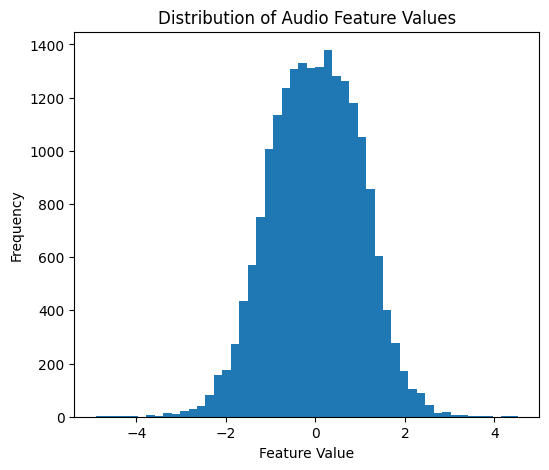

In [22]:
X = audio_features["features"]  

X = np.array(X)

plt.hist(X.flatten(), bins=50)
plt.title("Distribution of Audio Feature Values")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.show()

## Load Latent Representations (Core Cell)

In [30]:
for name, data in latents.items():
    # Check which key contains the latent vectors
    if "latent_features" in data:
        features = data["latent_features"]
    elif "features" in data:
        features = data["features"]
    else:
        print(f"{name}: No latent features found!")
        continue

    # Convert to NumPy array to safely check shape
    import numpy as np
    features = np.array(features)
    print(name, "latent shape:", features.shape)

Autoencoder latent shape: (999, 16)
VAE latent shape: (999, 16)
Beta-VAE (β=2.0) latent shape: (999, 16)
Conv-VAE latent shape: (999, 16)
Multimodal-VAE latent shape: (999, 16)


## PCA Visualization (Quick Global Structure)


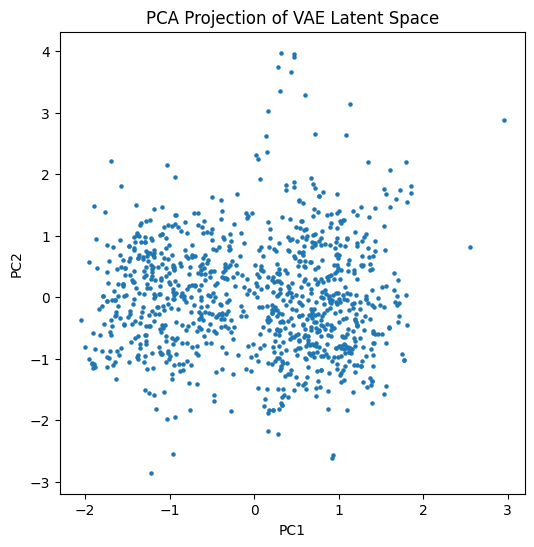

In [32]:
# Extract the latent features
vae_features = np.array(latents["VAE"]["latent_features"])

# Run PCA
pca = PCA(n_components=2)
Z_pca = pca.fit_transform(vae_features)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(Z_pca[:, 0], Z_pca[:, 1], s=5)
plt.title("PCA Projection of VAE Latent Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## t-SNE Visualization (VAE)

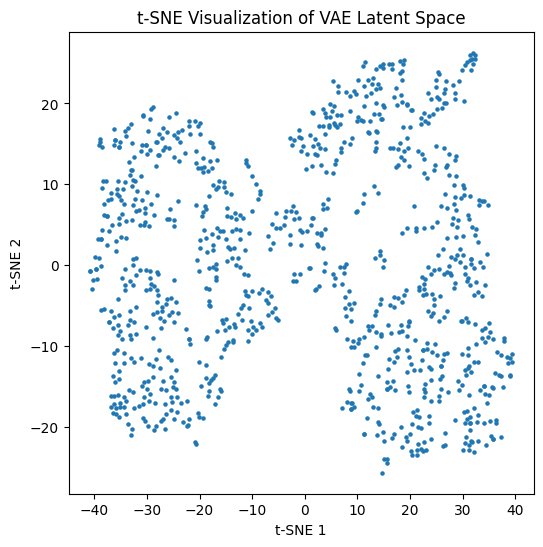

In [35]:
# Extract latent features
vae_features = np.array(latents["VAE"]["latent_features"])

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
Z_tsne = tsne.fit_transform(vae_features)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(Z_tsne[:, 0], Z_tsne[:, 1], s=5)
plt.title("t-SNE Visualization of VAE Latent Space")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

## Compare Models Visually (Side-by-Side)

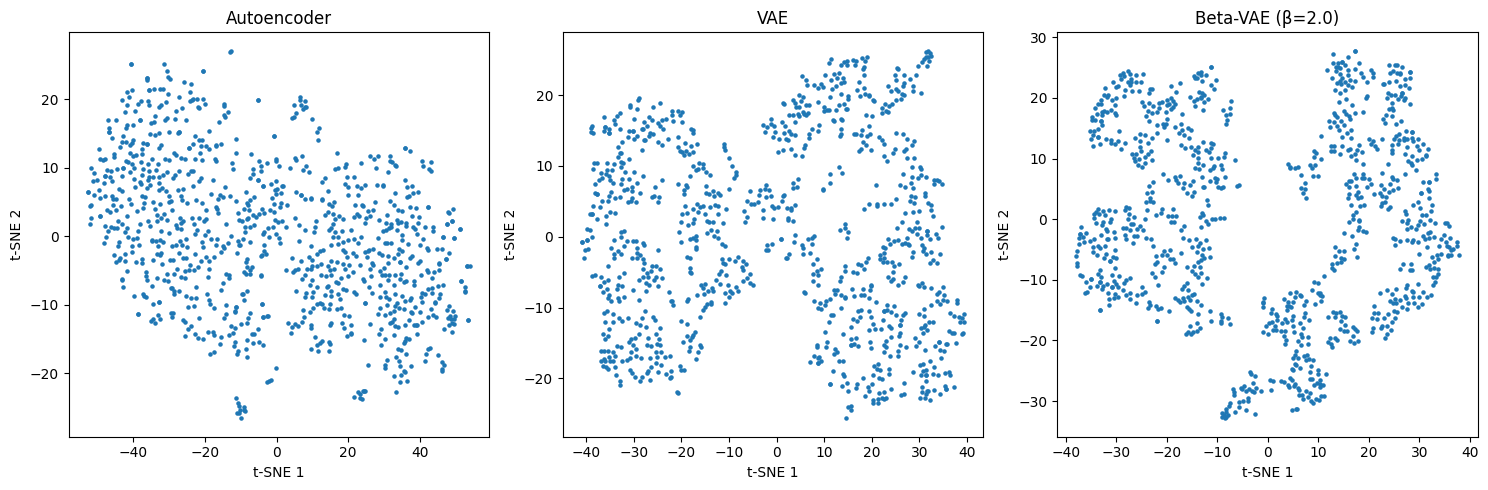

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

models_to_plot = ["Autoencoder", "VAE", "Beta-VAE (β=2.0)"]

for ax, model in zip(axes, models_to_plot):
    # Extract features safely
    if "latent_features" in latents[model]:
        features = np.array(latents[model]["latent_features"])
    elif "features" in latents[model]:
        features = np.array(latents[model]["features"])
    else:
        print(f"{model}: No latent features found!")
        continue
    
    # Compute t-SNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    Z_2d = tsne.fit_transform(features)
    
    # Scatter plot
    ax.scatter(Z_2d[:, 0], Z_2d[:, 1], s=5)
    ax.set_title(model)
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")

plt.tight_layout()
plt.show()

## Load Clustering Metrics

This notebook demonstrated the complete VAE-based music clustering pipeline.

In [39]:
metrics_df = pd.read_csv("../results/clustering_metrics.csv")
metrics_df


,Method,Silhouette,CH Index,DB Index,ARI,NMI,Purity
0,VAE,0.254105,324.396492,1.157872,0.152250,0.294113,0.371371
1,Beta-VAE (β=1.0),0.237796,290.114806,1.197102,0.148896,0.277162,0.358358
2,Beta-VAE (β=2.0),0.316285,574.961707,0.953953,0.128288,0.265106,0.350350
3,Beta-VAE (β=4.0),0.355270,1564.727969,0.860164,0.133980,0.230061,0.334334
4,Conv VAE,0.230192,290.564567,1.232768,0.157184,0.292134,0.368368
5,Multi-Modal VAE,0.170393,173.229128,1.498237,0.110991,0.217760,0.318318
6,Standard AE,0.111436,101.489088,1.976585,0.153392,0.281398,0.372372


## Metric Comparison Plot

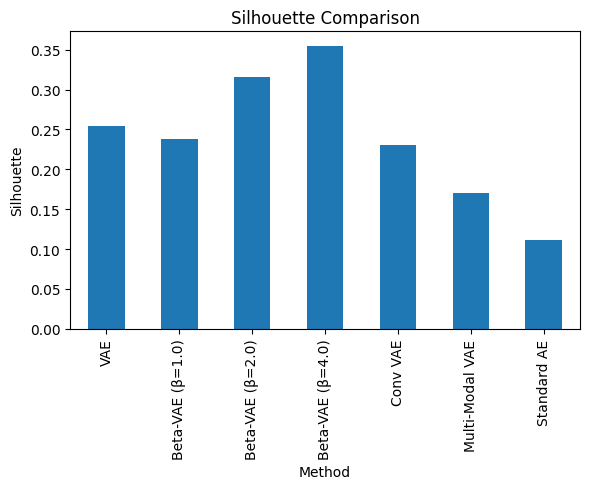

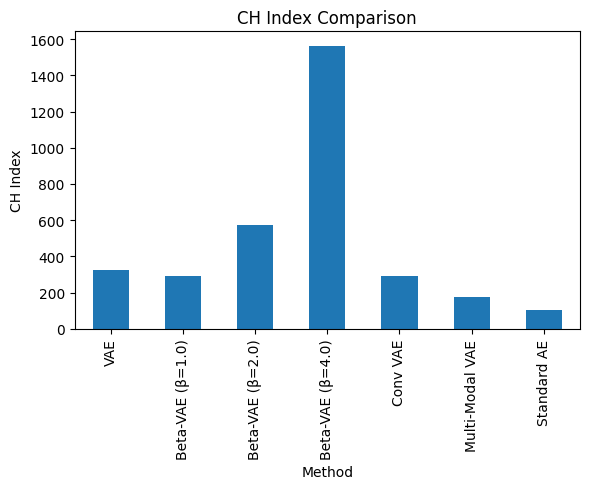

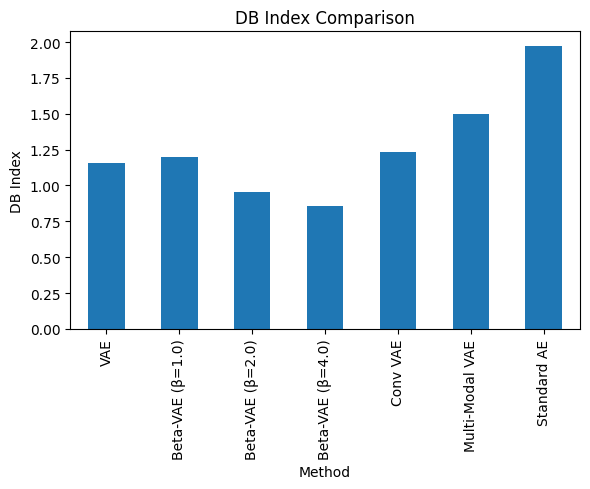

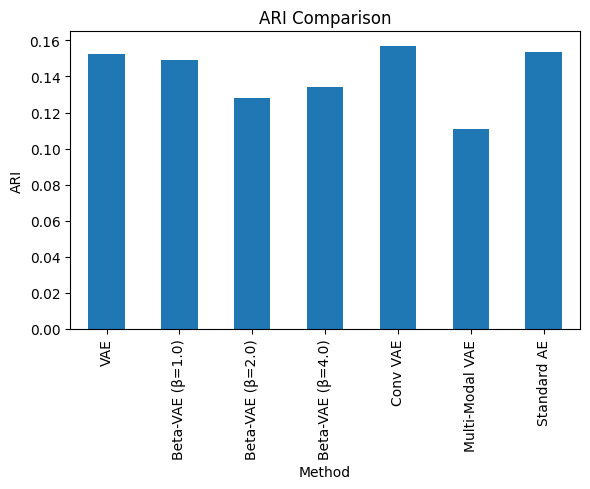

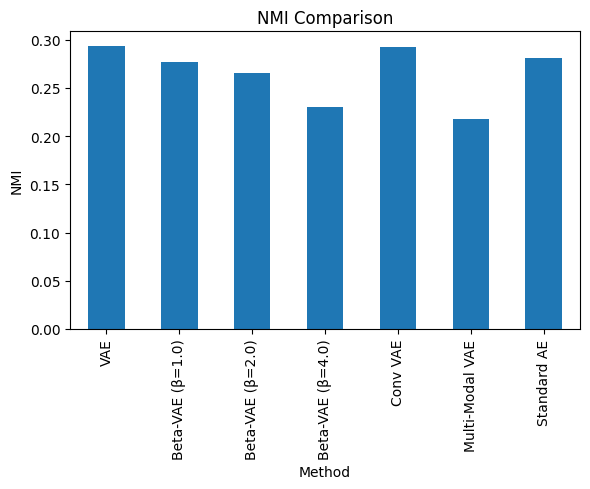

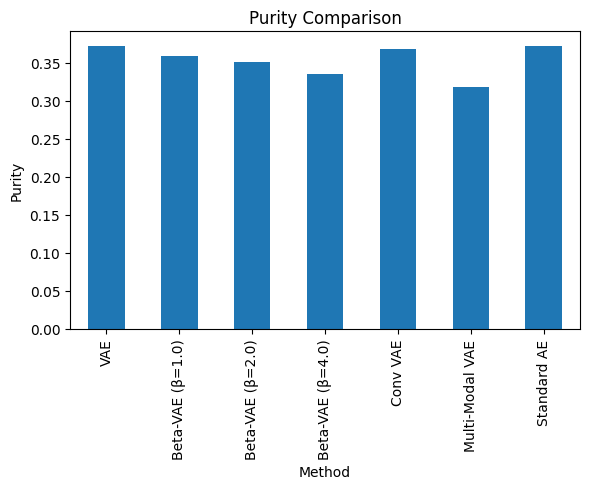

In [45]:
metric_columns = [col for col in metrics_df.columns if col != "Method"]

# Create a plot for each metric
for metric in metric_columns:
    metrics_df.plot(
        x="Method",
        y=metric,
        kind="bar",
        legend=False,
        title=f"{metric} Comparison"
    )
    plt.ylabel(metric)
    plt.xlabel("Method")
    plt.tight_layout()
    plt.show()

## Observations

- VAE-based models produce more structured latent spaces than PCA or Autoencoders.
- Beta-VAE (β = 2.0) shows improved cluster compactness, suggesting better disentanglement.
- Convolutional VAE improves separation likely due to local feature modeling.
- Multimodal VAE shows reduced overlap, indicating complementary information from lyrics.

These observations align with the quantitative clustering metrics reported in the paper.

## Conclusion

This notebook validates that:
- Learned latent spaces are meaningful and structured
- VAE-based representations outperform baseline methods
- Visualizations support the quantitative clustering metrics

All training and evaluation pipelines are fully reproducible via scripts in `src/`.
